# Tarea Examen 1
### Ejercicio 1

## Jonathan Alexis Urrutia Anguiano 414011025

In [1]:
from pylab import *
%matplotlib inline

Tenemos que la ecuación de movimiento de un oscilador  en dos dimensiones considerando una fricción $f_{fr} = f_{fr}\left(\dot{\vec r}\right)$, es la siguiente:

$$
m \ddot{\vec r} = - k \vec r + f_{fr}\left(\dot{\vec r}\right)
$$

Se tomará

$$
f_{fr}\left(\dot{\vec r}\right) =
\left\{ \begin{array}{c c}
-\gamma \dot {\vec r}  &  \mbox{si } |\dot{\vec r}|<1 \\
-\mu |\dot{\vec r}|^{1/2} \dot {\vec r} &  \mbox{si } |\dot{\vec r}|>1 \\
\end{array}\right.
$$

Este problema se resolvera tanto en coordenadas cartesianas como en polares.

### a,i) Ec. de movimeinto en cartesianas

Como $\vec r = x \hat{e_x} + y \hat{e_y},\, \dot{\vec r} = \dot x \hat{e_x} + \dot y \hat{e_y}\mbox{ y }\ddot{\vec r} = \ddot x \hat{e_x} + \ddot y \hat{e_y} $

$$ 
\begin{array}{c c r}
\mbox{Si } \dot x^2 + \dot y ^2 < 1\\
& m \ddot x = -k x - \gamma \dot x & \mbox{en } \hat{e_x} \\
& m \ddot y = -k y - \gamma \dot y &  \mbox{en } \hat{e_y}\\
\mbox{Si } \dot x^2 + \dot y ^2 > 1\\
&  m \ddot x = -k x - \mu (\dot x^2 + \dot y ^2)^{1/4}\dot x &  \mbox{en } \hat{e_x} \\
 &  m \ddot y = -k y - \mu (\dot x^2 + \dot y ^2)^{1/4}\dot y &  \mbox{en } \hat{e_y}
\end{array}
$$

Haciendo los cambios de variables $u_1 = x,\,v_1=y,\,u_2 = \dot x\mbox{ y }v_2 = \dot y$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\mbox{Si } u_2^2 + v_2^2< 1 & & \mbox{Si } u_2^2 + v_2^2> 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ -\frac{k}{m} u_1 -\frac{\gamma}{m} u_2 \\ -\frac{k}{m} v_1 -\frac{\gamma}{m} v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ -\frac{k}{m} u_1 -\frac{\mu}{m} (u_2^2 + v_2^2)^{1/4}u_2 \\ -\frac{k}{m} v_1 -\frac{\mu}{m} (u_2^2 + v_2^2)^{1/4}v_2 
\end{array}\right)
\end{align}


In [2]:
def resorte_cartesianas(x, t, m = 1., k=1., gamma = .1, mu = .2):  #x = [x,y,vx,vy]
    u1, v1, u2, v2 = x[0], x[1], x[2], x[3]  
    norm_vel = sqrt(u2**2 + v2**2) 
    du1, dv1 = u2, v2
    
    if norm_vel <= 1:
        du2 = -(k/m)*u1 - (gamma/m)*u2
        dv2 = -(k/m)*v1 - (gamma/m)*v2
    else:
        du2 = -(k/m)*u1 - (mu/m)*sqrt(norm_vel)*u2
        dv2 = -(k/m)*v1 -  (mu/m)*sqrt(norm_vel)*v2
    return array([du1, dv1, du2, dv2])

### a,ii)  Ec. de movimeinto en polares

Sean $\hat{e_r} = \cos\theta \hat{e_x} + \sin\theta \hat{e_y},\, \hat{e_\theta} = -\sin\theta \hat{e_x} + \cos\theta \hat{e_y} \mbox{ y } r =\sqrt{x^2+y^2}$. 
Entonces
$\vec r = r \hat{e_r},\, \dot{\vec r} =\dot r \hat{e_r} + r\dot \theta \hat{e_\theta}\mbox{ y }\ddot{\vec r} = (\ddot r-r\dot\theta^2) \hat{e_r}+(2\dot r\dot\theta+r\ddot\theta) \hat{e_\theta}  $

$$ 
\begin{array}{c c r}
\mbox{Si } {\dot r}^2+ r^2\dot\theta^2 < 1\\
& m (\ddot r-r\dot\theta^2) = -k r - \gamma \dot r & \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) = - \gamma r\dot\theta &  \mbox{en } \hat{e_\theta}\\
\mbox{Si } {\dot r}^2+ r^2\dot\theta^2 > 1\\
& m (\ddot r-r\dot\theta^2) = -k r - \mu ({\dot r}^2+ r^2\dot\theta^2)^{1/4} \dot r & \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) = - \mu ({\dot r}^2+ r^2\dot\theta^2)^{1/4}  r\dot\theta &  \mbox{en } \hat{e_\theta}
\end{array}
$$

Haciendo los cambios de variables $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\mbox{Si } u_2^2+ u_1^2 v_2^2 < 1& & \mbox{Si } u_2^2+ u_1^2 v_2^2  > 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\gamma}{m} u_2 \\ -(2\frac{ u_2}{u_1}+\frac{\gamma}{m}) v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\mu}{m}((u_2^2+ u_1^2 v_2^2)^{1/4}) u_2 \\ -(2\frac{ u_2}{u_1}+\frac{\mu}{m}(u_2^2+ u_1^2 v_2^2)^{1/4}) v_2 
\end{array}\right) 
\end{align}


In [3]:
def resorte_polares(r, t, m = 1., k= 1., gamma = .1, mu = .2):  #r = [r, theta, dot r, dot theta]
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
    norm_vel = sqrt(u2**2 +(u1*v2)**2) 
    du1, dv1 = u2, v2
        
    if u1 != 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2
        dv2 = -(2*(u2/u1)+(gamma/m))*v2
    elif u1 != 0 and norm_vel > 1:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2
        dv2 = -(2*(u2/u1)+(gamma/m)*sqrt(norm_vel))*v2
    elif u1 == 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2
        dv2 = 0
    else:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2
        dv2 = 0        
        
    return array([du1, dv1, du2, dv2])

### b) Encontrar las soluciones en $\vec r_0 = (0,1)$ y $\dot{\vec r_0} = (\cos\theta,\sin\theta)$  donde $\theta = n \pi /6$ con $n = 0,  1,2,...,11$

Para la primera condición se utilizará en cartesianas y en las demás se usará en polares. Se utilizará el método de Runge-Kutta para encontrar las soluciones.

In [4]:
def rk4(func, x_0, intervalo, args=0 ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    if args==0:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i],args)
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,args)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,args)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h,args)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y    

### Espacio Físico

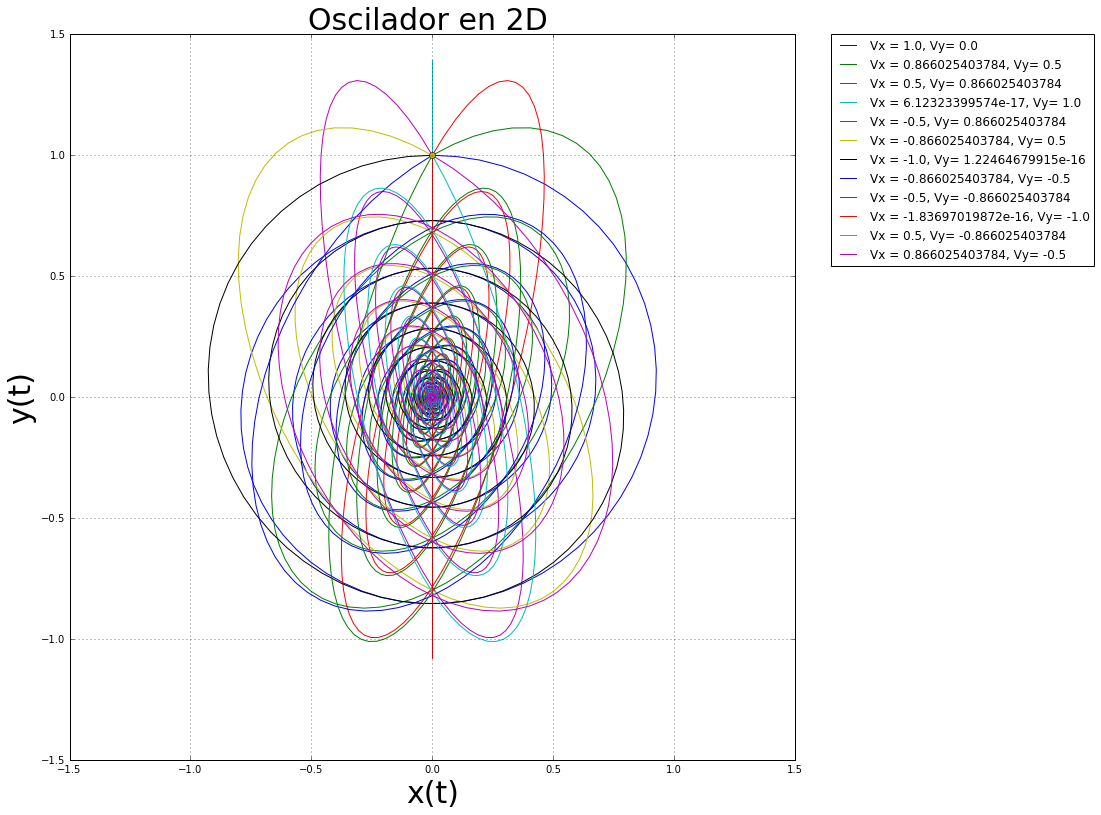

In [6]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Oscilador en 2D ',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,0], sol_c[:,1], label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
plot(0,1,'o')
ax.set_aspect('equal', 'datalim')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

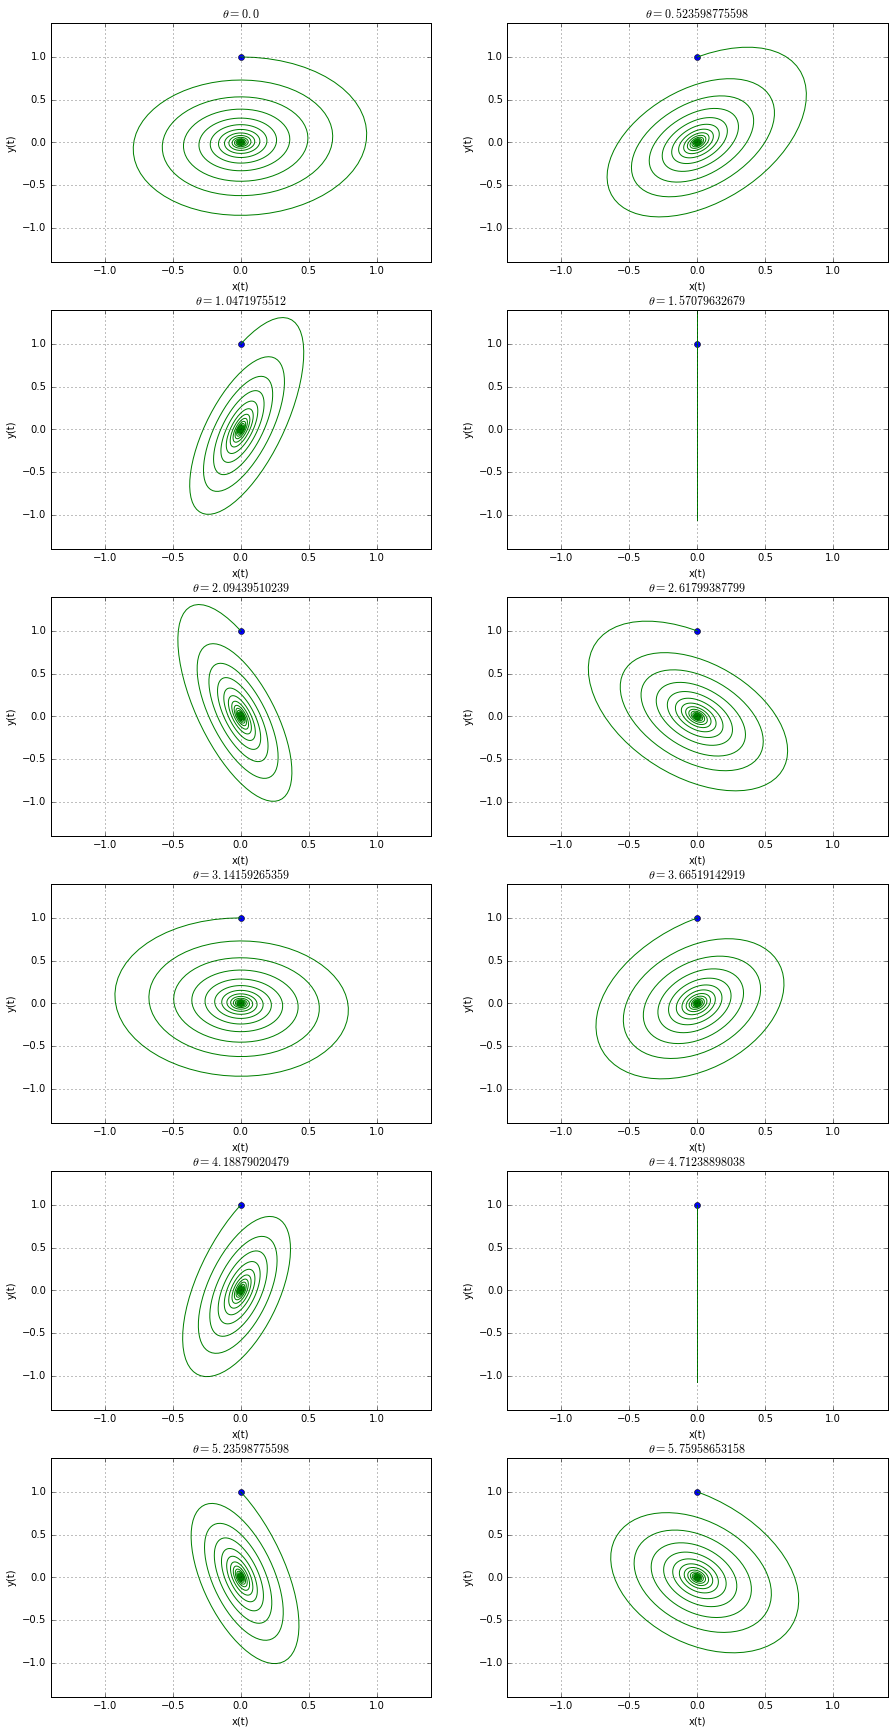

In [66]:
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1)
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True), title(r'$\theta = %s$' %(str(ang[i]))),xlabel('x(t)'),ylabel('y(t)')
    plot(0,1,'o')
    plot(sol_c[:,0], sol_c[:,1], label = 'Vx = %s, Vy= %s' %(cos(ang[i]),sin(ang[i])))
    
show()

### Espacio face (en X)

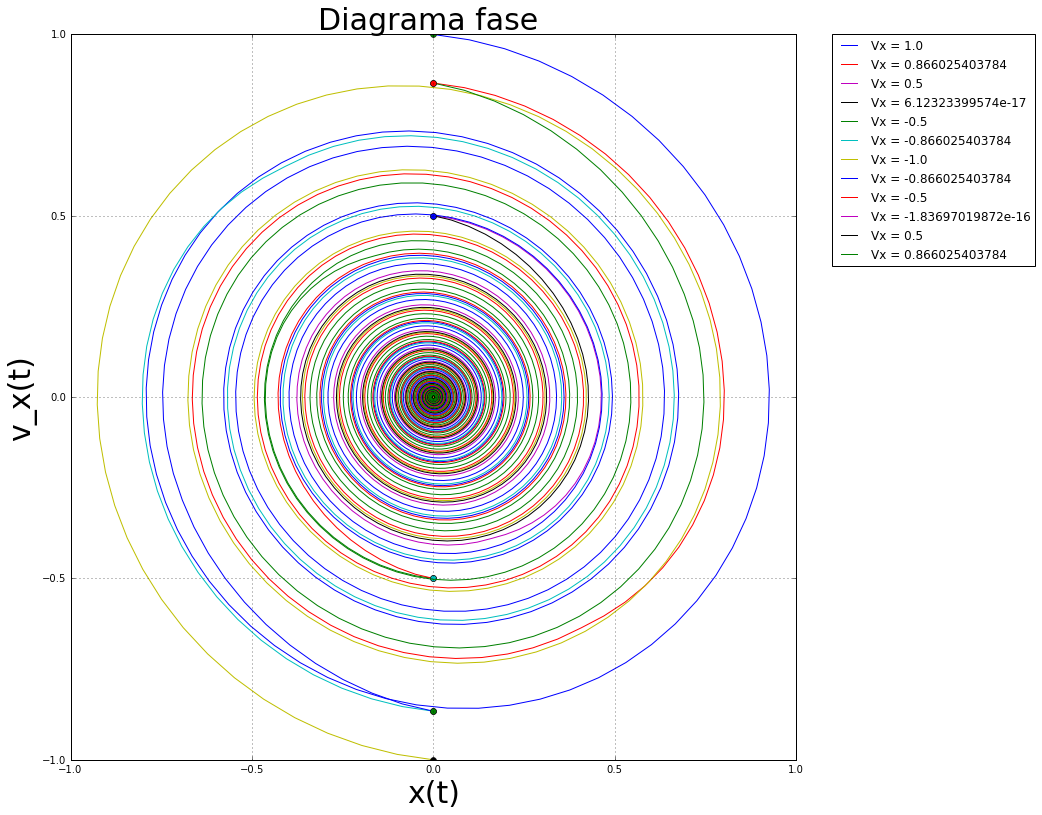

In [7]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Diagrama fase ',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('v_x(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,0], sol_c[:,2], label = 'Vx = %s' %(cos(a)))
    plot(0,cos(a),'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

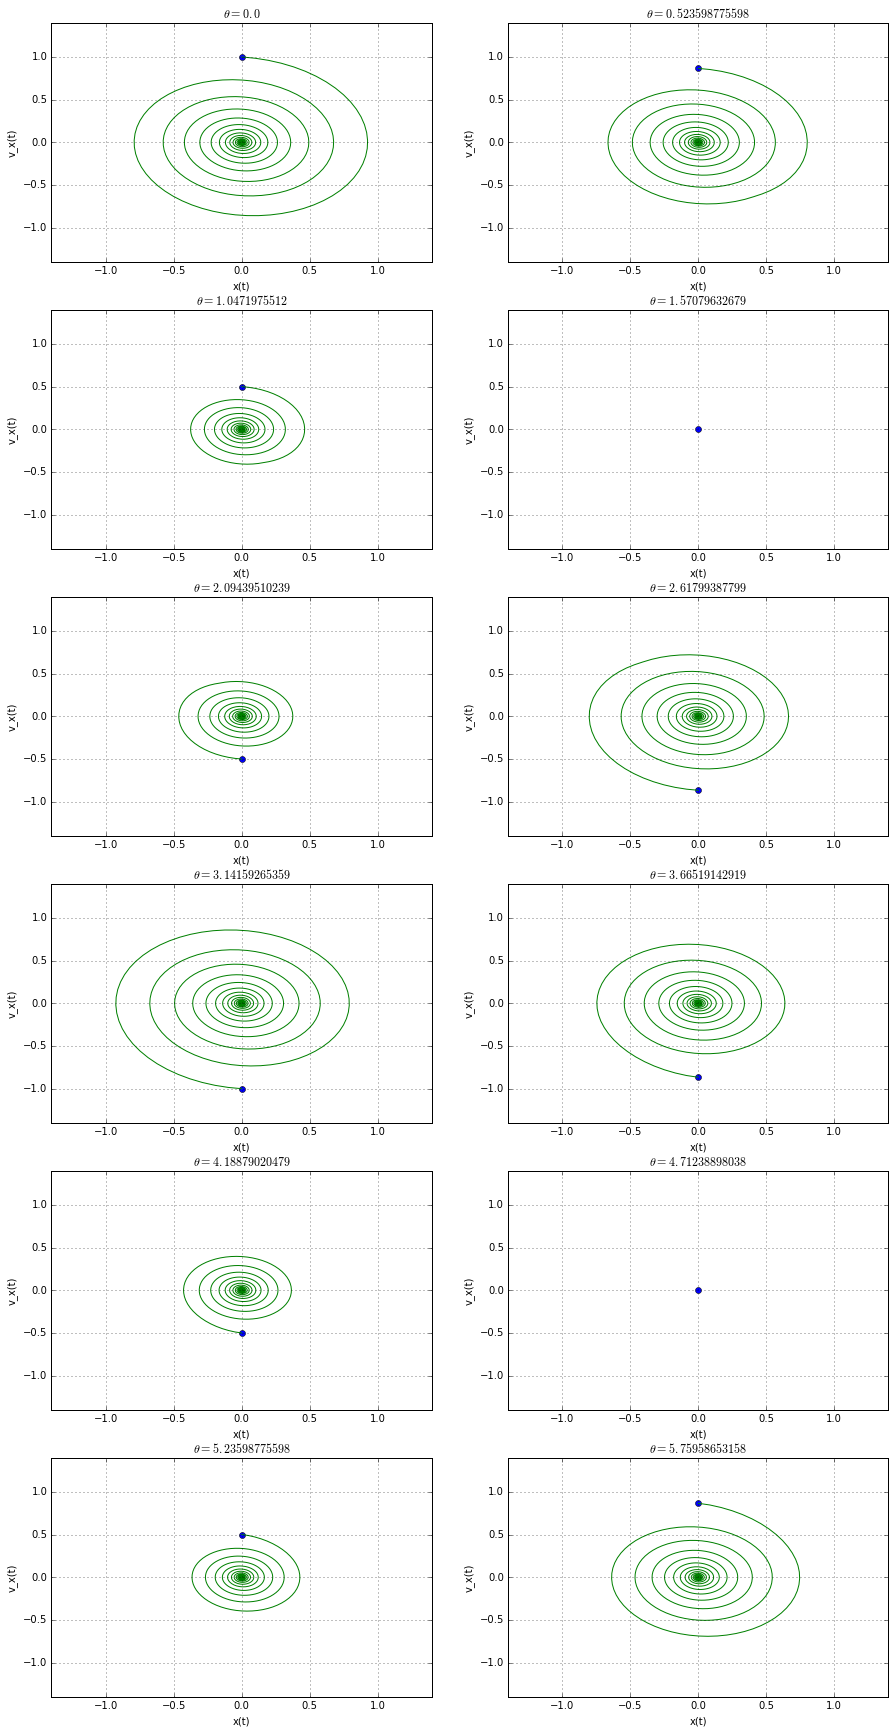

In [68]:
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1)
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True), title(r'$\theta = %s$' %(str(ang[i]))),xlabel('x(t)'),ylabel('v_x(t)')
    plot(0,cos(ang[i]),'o')
    plot(sol_c[:,0], sol_c[:,2], label = 'Vx = %s, Vy= %s' %(cos(ang[i]),sin(ang[i])))
    
show()

### Espacio face (en Y)

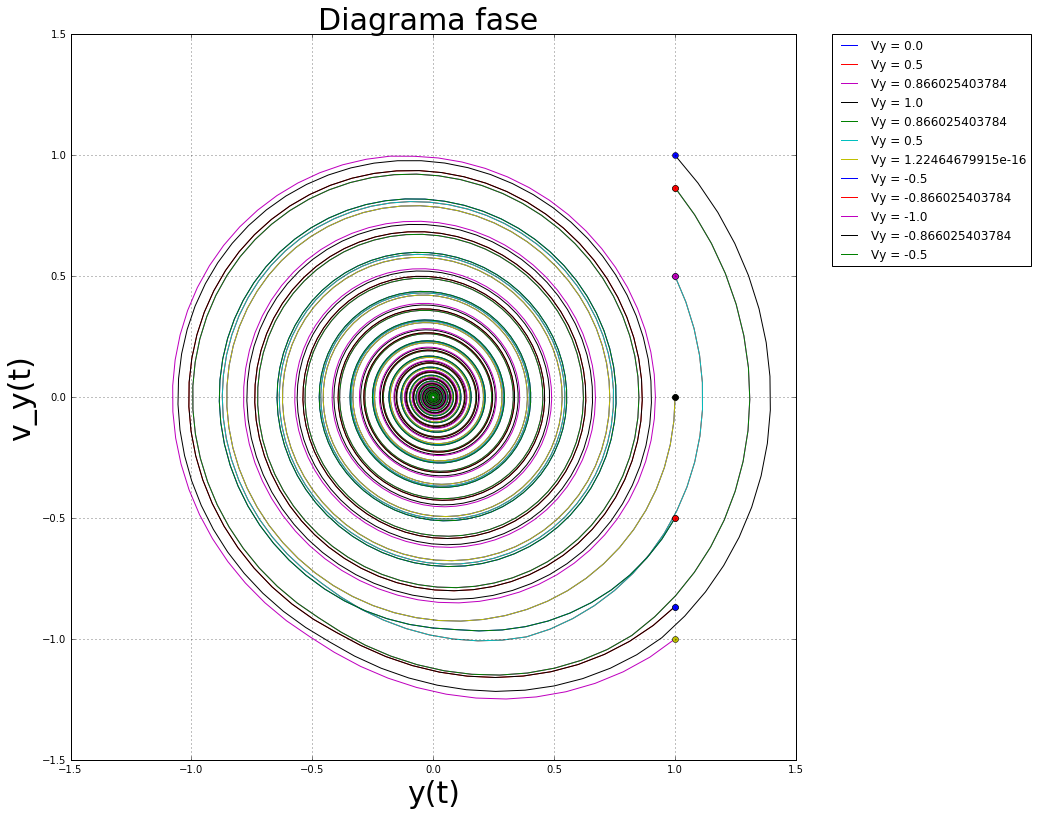

In [37]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Diagrama fase ',fontsize = 30),xlabel('y(t)',fontsize=30),ylabel('v_y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,1], sol_c[:,3], label = 'Vy = %s' %(sin(a)))
    plot(1,sin(a),'o')
xlim (-1.5,1.5), ylim(-1.5,1.5)  
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

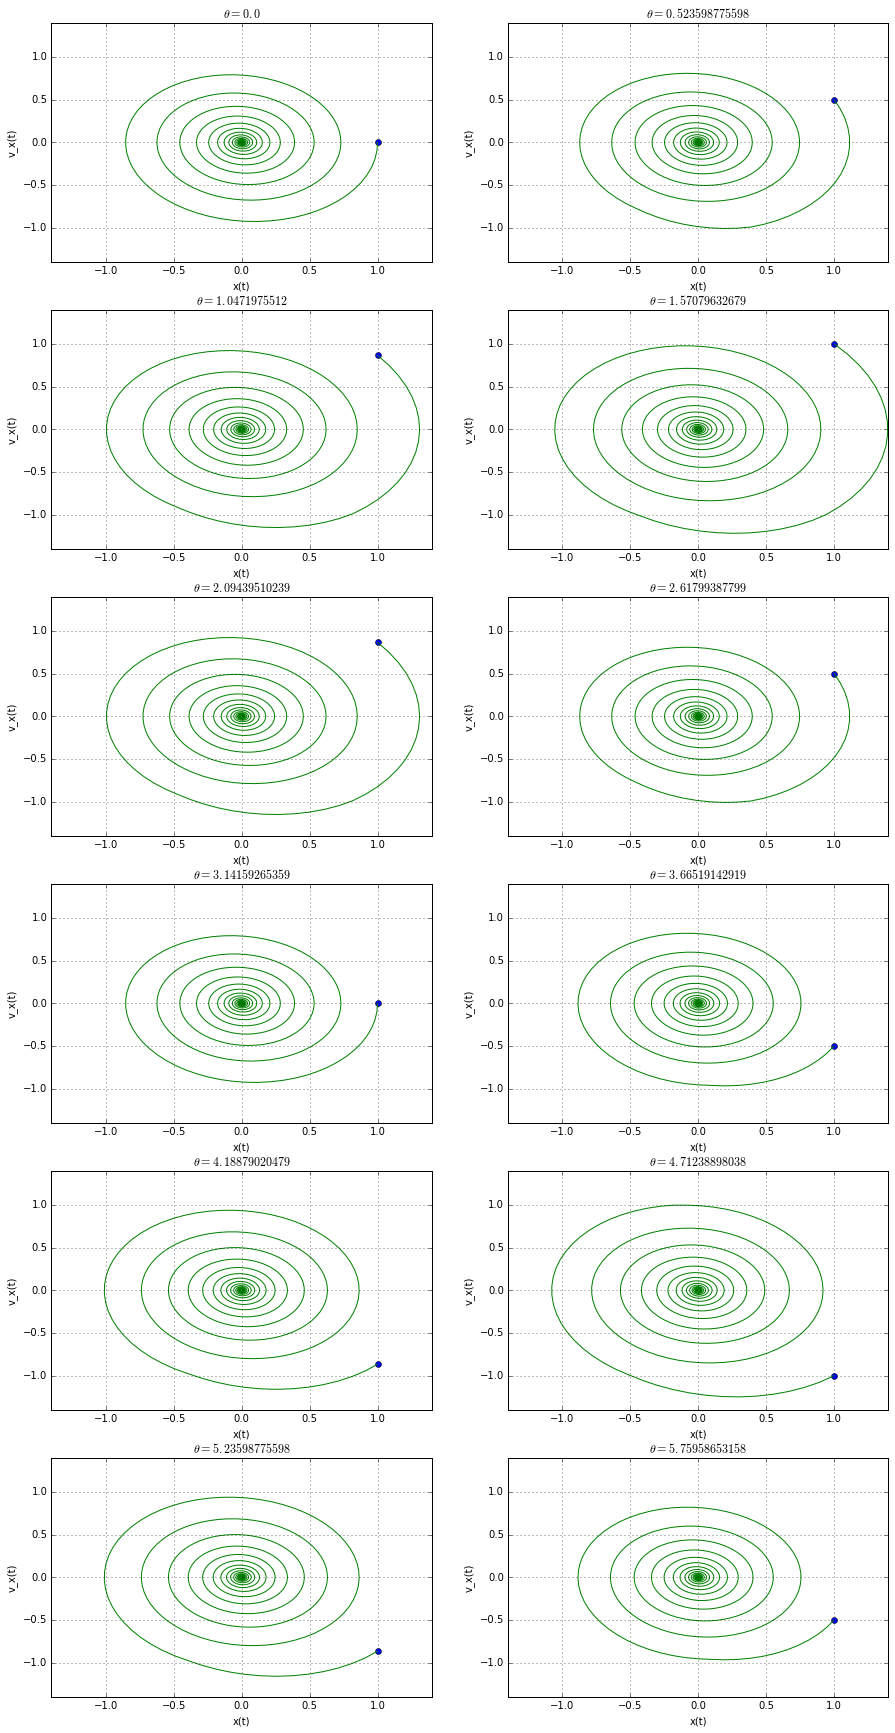

In [70]:
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1)
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True), title(r'$\theta = %s$' %(str(ang[i]))),xlabel('x(t)'),ylabel('v_x(t)')
    plot(1,sin(ang[i]),'o')
    plot(sol_c[:,1], sol_c[:,3], label = 'Vy= %s' %(sin(ang[i])))
    
show()

## En coordenadas polares

C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Jonathan\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in add


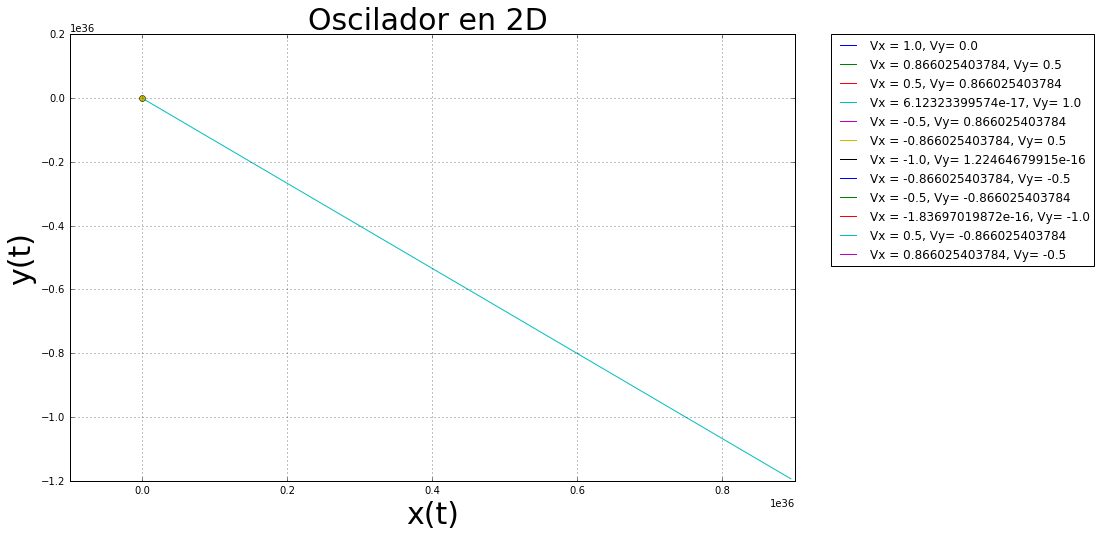

In [10]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'Oscilador en 2D ',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    #cond_ini = [1,pi/2,1,a]
    cond_ini = [1,pi/2,-sin(a), cos(a)]
    t_c, sol_c = rk4(resorte_polares, cond_ini, [0,t_f])
    plot(sol_c[:,0]*cos(sol_c[:,1]),sol_c[:,0]*sin(sol_c[:,1]) , label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
plot(0,1,'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

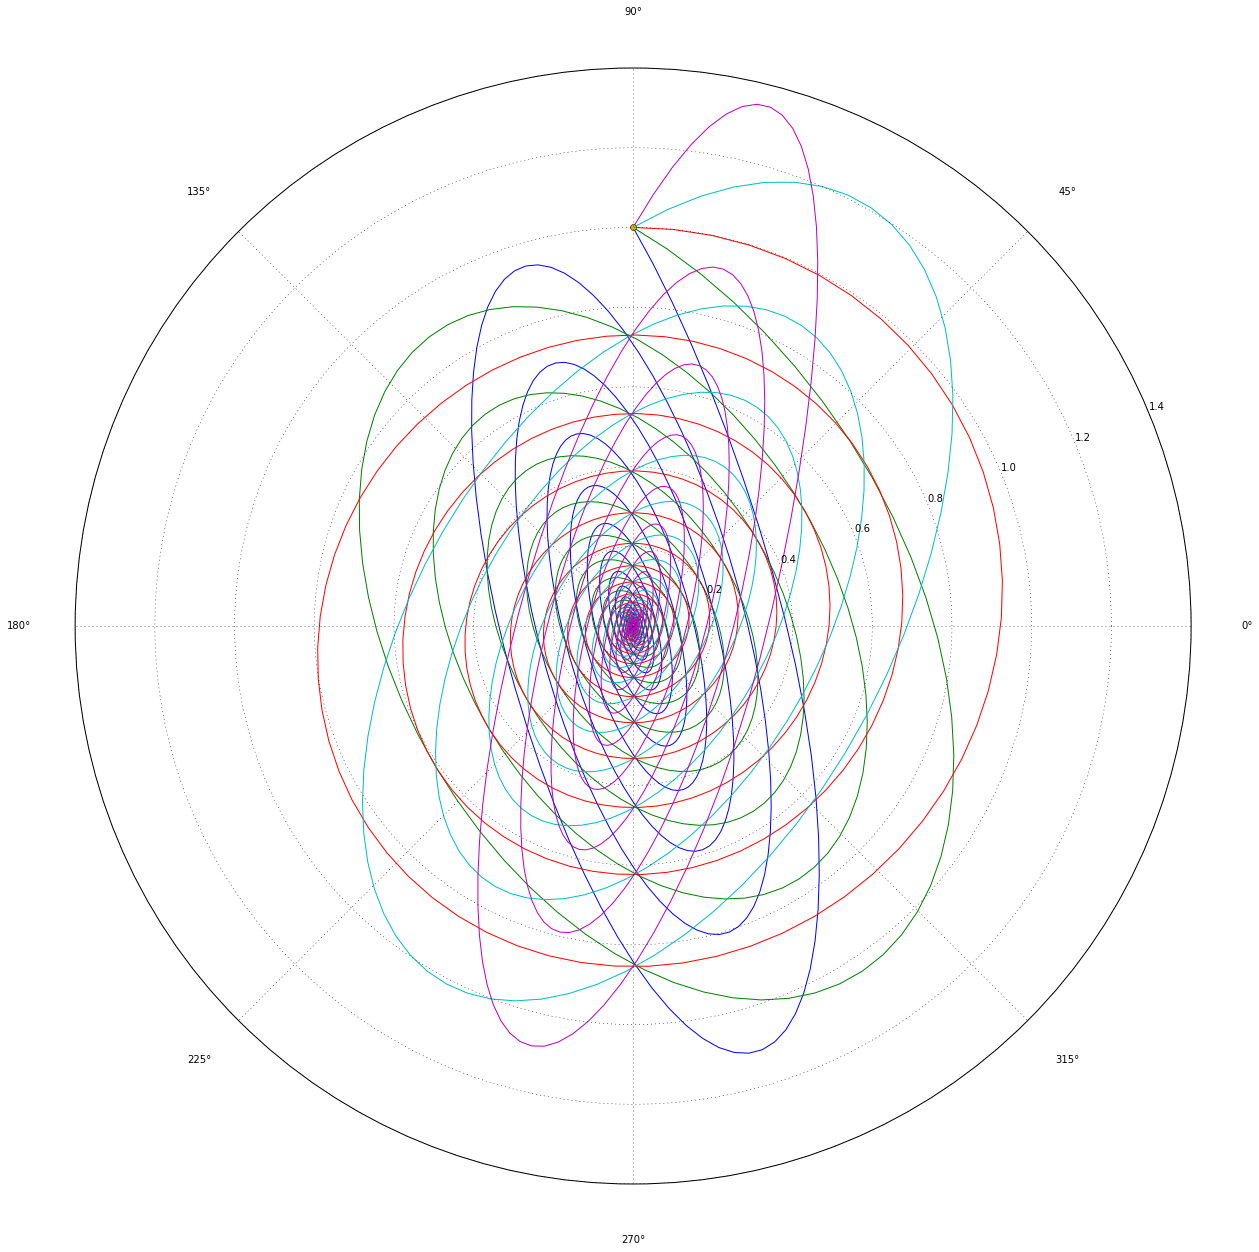

In [13]:
ang = arange(4,9,1)*pi/6
t_f = 100

fig = figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
grid(True)
for a in ang:
    #cond_ini = [1,pi/2,cos(a)**2-sin(a),sin(a)**2+cos(a)]
    s = sin(a)
    c = cos(a)
    cond_ini = [1,pi/2, -s ,c]
    t_c, sol_c = rk4(resorte_polares, cond_ini, [0,t_f])
    
    ax.plot(sol_c[:,1], sol_c[:,0], linewidth=1)
    #plot(sol_c[:,0]*cos(sol_c[:,1]),sol_c[:,0]*sin(sol_c[:,1]) , label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
plot(pi/2,1,'o')
show()

In [14]:
print ang

[ 2.0943951   2.61799388  3.14159265  3.66519143  4.1887902 ]


### La Energía y el momento angular

In [76]:
def Energia(x_p, k= 1.):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px + py*py) - 0.5* k*sqrt(x**2+y**2)
    return E

En general, el deferencial de trabajo es
$$ dW = \vec{F}\cdot \vec{dr} $$
entonces la enegía puede escribirse como
$$ U = - \int \vec{F} (\vec{r}(t)) \cdot \dot {\vec{r}}(t) \, dt $$
Dado que conocermos la ecuación de movimiento y su solución, podemos hacer la integral "a mano". La energía, separada en componentees es

In [ ]:
def fuerza(x_v,t,k =1 , gamma = .1, mu=.2):
    x, y, vx, vy = x_v[:,0],x_v[:,1],x_v[:,2],x_v[:,3]
    norm_vel = sqrt(vx**2+vy**2)
    if norm_vel <= 1:
        Fx = -(k)*x - (gamma)*vx
        Fy = -(k)*y - (gamma)*vy
    else:
        Fx = -(k)*x - (mu)*sqrt(norm_vel)*vx
        Fy = -(k)*y -  (mu)*sqrt(norm_vel)*vy
    return array([Fx,Fy])

In [26]:
def Energia(x_p,k =1.):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px* + py*py) + 0.5*k* (x*x + y*y)
    return E

def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

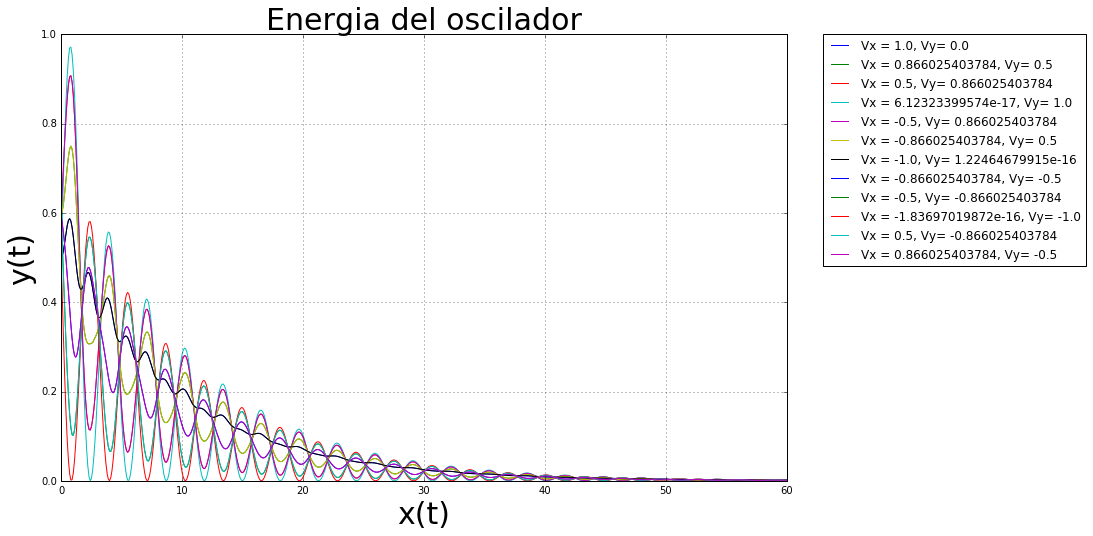

In [30]:
ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'Energia del oscilador',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    E = Energia(sol_c)
    plot(t_c, E, label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

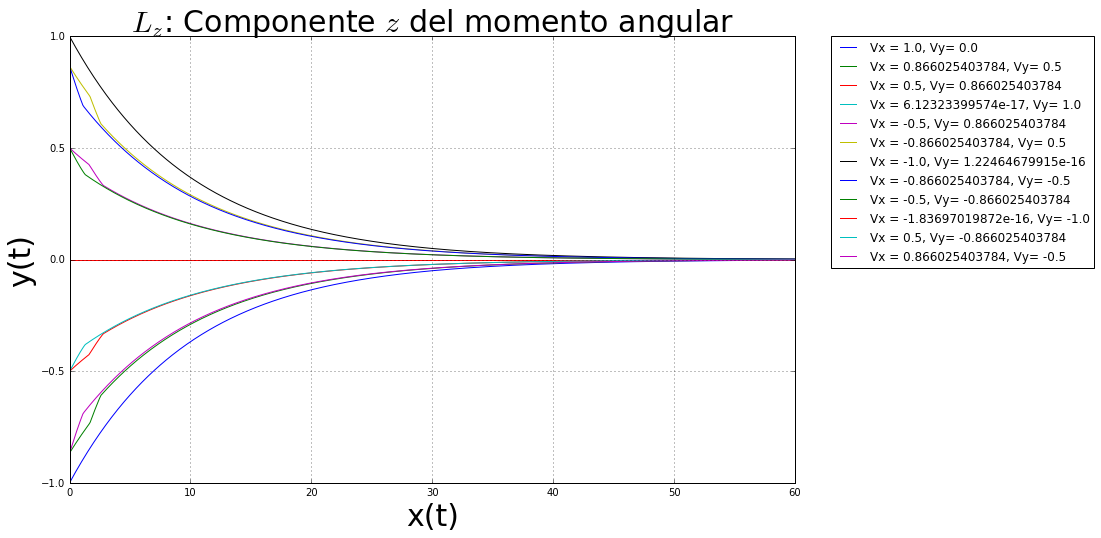

In [34]:
ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'$L_z$: Componente $z$ del momento angular',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    L = L_z(sol_c)
    plot(t_c, L, label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()